# Import software libraries and load the dataset #

In [1]:
import sys                             # Read system parameters.
import numpy as np                     # Work with multi-dimensional arrays and matrices.
import pandas as pd                    # Manipulate and analyze data.
import matplotlib as mpl               # Create 2D charts.
import matplotlib.pyplot as plt
import seaborn as sb                   # Perform data visualization.
import sklearn                         # Perform data mining and analysis.
from sklearn import datasets
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Summarize software libraries used.
print('Libraries used in this project:')
print('- Python {}'.format(sys.version))
print('- NumPy {}'.format(np.__version__))
print('- pandas {}'.format(pd.__version__))
print('- Matplotlib {}'.format(mpl.__version__))
print('- scikit-learn {}\n'.format(sklearn.__version__))

Libraries used in this project:
- Python 3.10.12 (main, Jun 11 2023, 05:26:28) [GCC 11.4.0]
- NumPy 1.23.5
- pandas 1.5.3
- Matplotlib 3.7.1
- scikit-learn 1.2.2



# Get acquainted with the dataset #

1. Import the iris dataset.
2. Convert the dataset to a dataframe.
    - The rows has the data.
    - Do not forget the column names.
    - Also the target label.
3. Print the first ten rows.

In [2]:
from sklearn import datasets

iris = datasets.load_iris()

In [3]:
# Convert the dataset to dataFrame
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)


In [4]:
# Add the target label to the DataFrame
iris_df['target'] = iris.target

In [5]:
# Print the first ten rows
iris_df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [6]:
num_rows, num_columns = iris_df.shape
print(f"\nNumber of Rows: {num_rows}")
print(f"Number of Columns: {num_columns}")


Number of Rows: 150
Number of Columns: 5


# Examine a general summary of statistics

In [7]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [8]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [9]:
iris_df.value_counts()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  target
5.8                2.7               5.1                1.9               2         2
6.2                2.2               4.5                1.5               1         1
                   2.9               4.3                1.3               1         1
                   3.4               5.4                2.3               2         1
6.3                2.3               4.4                1.3               1         1
                                                                                   ..
5.4                3.9               1.3                0.4               0         1
                                     1.7                0.4               0         1
5.5                2.3               4.0                1.3               1         1
                   2.4               3.7                1.0               1         1
7.9                3.8               6.4                2.0

# Identify outliers

In [10]:
#identify outliers using IQR
def identify_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (column < lower_bound) | (column > upper_bound)
    return outliers

outliers_df = iris_df[iris_df.columns[:-1]].apply(identify_outliers)


iris_df[outliers_df.any(axis=1)]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
15,5.7,4.4,1.5,0.4,0
32,5.2,4.1,1.5,0.1,0
33,5.5,4.2,1.4,0.2,0
60,5.0,2.0,3.5,1.0,1


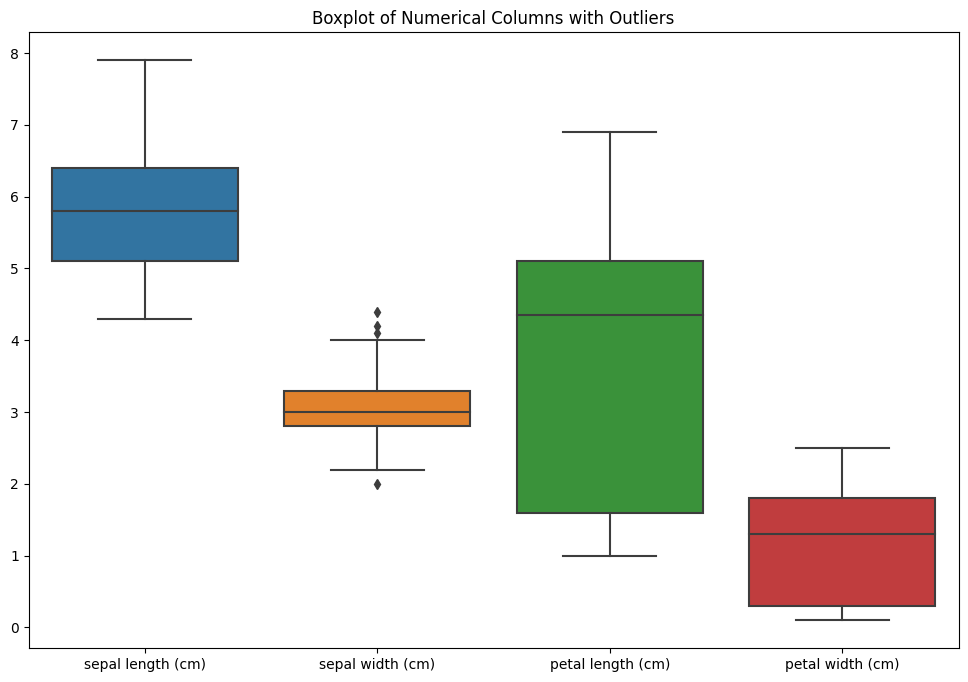

In [11]:

plt.figure(figsize=(12, 8))
sns.boxplot(data=iris_df.drop('target', axis=1))
plt.title('Boxplot of Numerical Columns with Outliers')
plt.show()

In [12]:
#Remove the outliers
cleaned_iris_df = iris_df[~outliers_df.any(axis=1)]

cleaned_iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


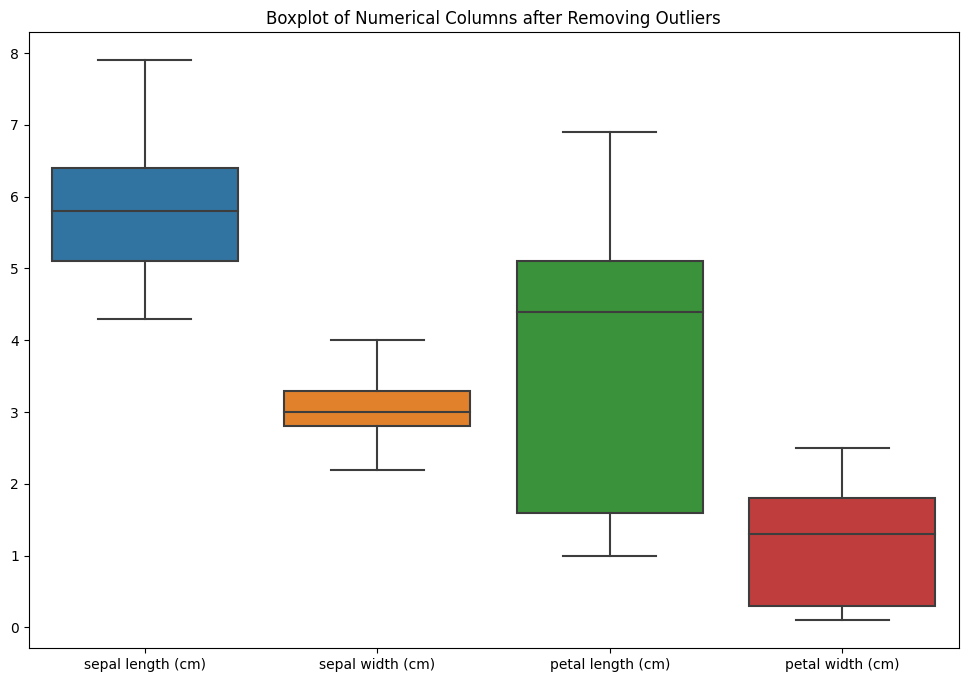

In [13]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=cleaned_iris_df.drop('target', axis=1))
plt.title('Boxplot of Numerical Columns after Removing Outliers')
plt.show()

# Reduce the dimensionality of the dataset

- We want just two classes of the target label.

In [14]:
selected_classes = [0, 1]
filtered_iris_df = iris_df[iris_df['target'].isin(selected_classes)]


# Examine the separation between classes using a scatter plot

- Sepal length along x-axis, sepal width along y-axis.

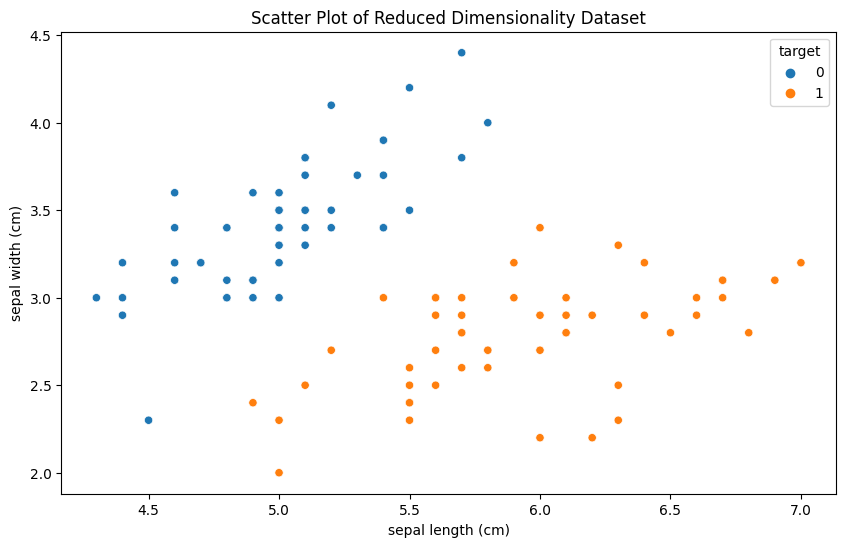

In [15]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)', hue='target', data=filtered_iris_df)
plt.title('Scatter Plot of Reduced Dimensionality Dataset')
plt.show()

# Plot a decision boundary for a given model

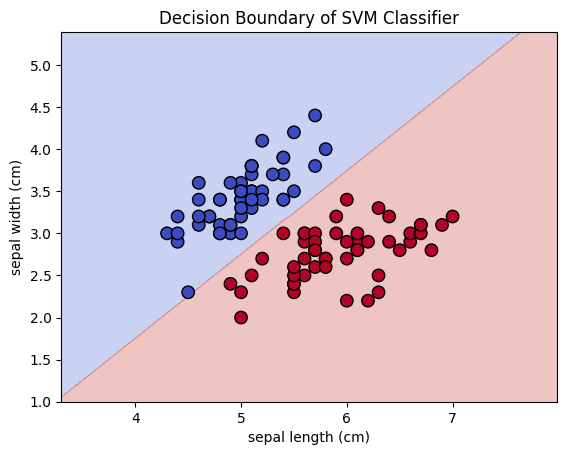

In [33]:
X = iris.data[:, :2]
y = iris.target

class_1, class_2 = 0, 1
selected_classes = np.logical_or(y == class_1, y == class_2)
X_binary = X[selected_classes]
y_binary = y[selected_classes]

X_train, X_test, y_train, y_test = train_test_split(X_binary, y_binary, test_size=0.3, random_state=42)

# 1-Train a Support Vector Machine (SVM) classifier
clf = SVC(kernel='linear', C=1)
clf.fit(X_train, y_train.reshape(-1,))

# 2-Plot decision boundary
x_min, x_max = X_binary[:, 0].min() - 1, X_binary[:, 0].max() + 1
y_min, y_max = X_binary[:, 1].min() - 1, X_binary[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')

plt.scatter(X_binary[:, 0], X_binary[:, 1], c=y_binary, cmap='coolwarm', edgecolors='k', marker='o', s=80)
plt.title('Decision Boundary of SVM Classifier')
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.show()

# Train a basic logistic regression model and plot its decision boundary

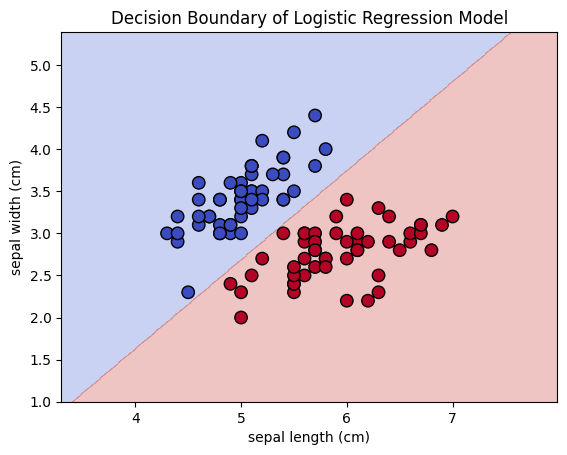

In [26]:
# 1-Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_binary, y_binary, test_size=0.3, random_state=42)

# 2-Train a Logistic Regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# 3-Plot decision boundary
x_min, x_max = X_binary[:, 0].min() - 1, X_binary[:, 0].max() + 1
y_min, y_max = X_binary[:, 1].min() - 1, X_binary[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)


plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')

plt.scatter(X_binary[:, 0], X_binary[:, 1], c=y_binary, cmap='coolwarm', edgecolors='k', marker='o', s=80)
plt.title('Decision Boundary of Logistic Regression Model')
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.show()


# Train an SVM model and plot its decision boundary plus margins

- Make the C parameter = 100.

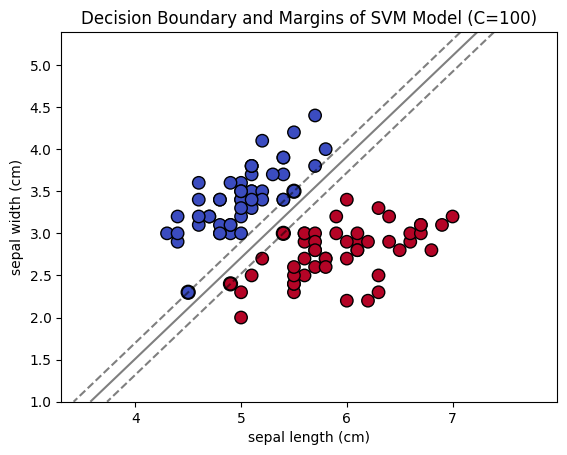

In [27]:
# 1-Train an SVM model with C parameter = 100
svm_model = SVC(kernel='linear', C=100)
svm_model.fit(X_binary, y_binary)
# 2-Plot decision boundary
x_min, x_max = X_binary[:, 0].min() - 1, X_binary[:, 0].max() + 1
y_min, y_max = X_binary[:, 1].min() - 1, X_binary[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

Z = svm_model.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)


plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])


plt.scatter(svm_model.support_vectors_[:, 0], svm_model.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='k')


plt.scatter(X_binary[:, 0], X_binary[:, 1], c=y_binary, cmap='coolwarm', edgecolors='k', marker='o', s=80)
plt.title('Decision Boundary and Margins of SVM Model (C=100)')
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.show()


# Reduce the regularization penalty to soften the margin

- Make the C parameter = 0.1

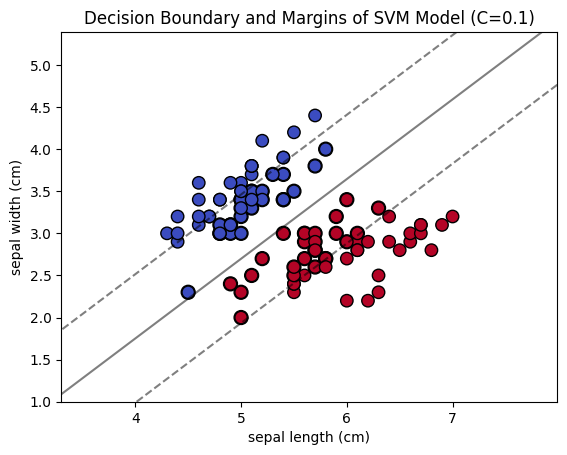

In [29]:
# 1-Train an SVM model with C parameter = 0.1 for a softer margin
svm_model_soft = SVC(kernel='linear', C=0.1)
svm_model_soft.fit(X_binary, y_binary)

# 2-Plot decision boundary
x_min, x_max = X_binary[:, 0].min() - 1, X_binary[:, 0].max() + 1
y_min, y_max = X_binary[:, 1].min() - 1, X_binary[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

Z = svm_model_soft.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)


plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])


plt.scatter(svm_model_soft.support_vectors_[:, 0], svm_model_soft.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='k')

plt.scatter(X_binary[:, 0], X_binary[:, 1], c=y_binary, cmap='coolwarm', edgecolors='k', marker='o', s=80)
plt.title('Decision Boundary and Margins of SVM Model (C=0.1)')
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.show()


# Split the datasets

In [34]:
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (105, 4)
X_test shape: (45, 4)
y_train shape: (105,)
y_test shape: (45,)


# Evaluate an SVM model using a holdout test set

In [32]:
y_pred = svm_model_soft.predict(X_test)

#Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

#Precision
precision = precision_score(y_test, y_pred)
print(f'Precision: {precision:.2f}')

#Recall
recall = recall_score(y_test, y_pred)
print(f'Recall: {recall:.2f}')

# F1-score
f1 = f1_score(y_test, y_pred)
print(f'F1-score: {f1:.2f}')

#Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)


Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1-score: 1.00
Confusion Matrix:
[[17  0]
 [ 0 13]]
